# 3.3 Máximos y mínimos con varias variables

1.- Encuentre los puntos críticos de $f(x,y)$ y resolviendo el sistema de ecuaciones simultáneas.
$$f_x(x,y)=0$$
$$f_y(x,y)=0$$

2.- La prueba de la segunda derivada será:
$$D(x,y)=f_{xx}(x,y)f_{yy}(x,y)-f^2_{xy}(x,y)$$

a. $D(a,b)>0$ y $f_{xx}(a,b)<0$ implica que $f(x,y)$ tiene un máximo relativo en el punto (a,b).

b. $D(a,b)>0$ y $f_{xx}(a,b)<0$ implica que $f(x,y)$ tiene un mínimo relativo en el punto (a,b).

c. $D(a,b)<0$ implica que $f(x,y)$ no tiene un máximo relativo ni iun mínimo relativo en el punto $(a,b)$. El punto $(a,b,f(a,b))$ se llama punto silla.

d. $D(a,b)=0$ nos indica que la prueba es inconclusa


# 3.4 Ejemplo: Encuentre y determine los extremos relativos de la función:

$$f(x,y)=x^2+y^2$$

In [18]:
%matplotlib notebook
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()
var("x y")

In [2]:
f=x**2+y**2
f

In [3]:
dxf=f.diff(x)
dxxf=dxf.diff(x)
dyf=f.diff(y)
dyyf=dyf.diff(y)
dxyf=dxf.diff(y)
dxf,dyf,dxxf,dyyf

In [4]:
p=solve([dxf,dyf],[x,y])
p

In [5]:
D=dxxf.subs({x:p[x],y:p[y]})*dxxf.subs({x:p[x],y:p[y]})-dxyf.subs({x:p[x],y:p[y]})**2
D

#### La prueba de la segunda derivada codificada se vería de la siguiente manera:

In [27]:
if D >0 and dxxf.subs({x:p[x],y:p[y]})<0:
    print("Existe un máximo relativo en el punto:")
    print("x=",p[x],"y=",p[y])
if D>0 and dxxf.subs({x:p[x],y:p[y]})>0:
    print("Existe un mínimo relativo en el punto:")
    print("x=",p[x],"y=",p[y])
if D<0:
    print("Existen un punto silla en la coordenada:")
    print("x=",p[x],"y=",p[y])
if D==0:
    print("La prueba es inconclusa")
    

Existe un mínimo relativo en el punto:
x= 0 y= 0


## Matriz Hessiana

In [6]:
H=hessian(f,[x,y])
H

⎡2  0⎤
⎢    ⎥
⎣0  2⎦

In [7]:
H.eigenvals()

#### En este caso la key del diccionario es el eigenvalor y el valor se refiere a la multiplicidad

Concluimos que la matriz es definida positiva porque plos dos valores propios son positivos y repetidos igual a 2, entonces tiene un mínimor relativo en el punto 

# 4.1 Condicion de suficiencia

## 4.3 Ejemplo


$f(x,y)=x^3+3y^3+3x^2+3y^2+24 $

In [91]:
f=x**3+3*y**3+3*x**2+3*y**2+24
f

In [92]:
nablaf=[f.diff(var) for var in [x,y]]
nablaf

In [93]:
#puntos críticos
pcs=solve(nablaf)
pcs

In [94]:
H=hessian(f,[x,y])
H

⎡6⋅x + 6     0    ⎤
⎢                 ⎥
⎣   0     18⋅y + 6⎦

In [46]:
for pc in pcs:
    eig=H.subs(pc).eigenvals()
    print("Punto crítico: ",pc,"sus eigenvalores son: ",eig)

Punto crítico:  {x: -2, y: -2/3} sus eigenvalores son:  {-6: 2}
Punto crítico:  {x: -2, y: 0} sus eigenvalores son:  {-6: 1, 6: 1}
Punto crítico:  {x: 0, y: -2/3} sus eigenvalores son:  {-6: 1, 6: 1}
Punto crítico:  {x: 0, y: 0} sus eigenvalores son:  {6: 2}


## Graficar

<IPython.core.display.Javascript object>


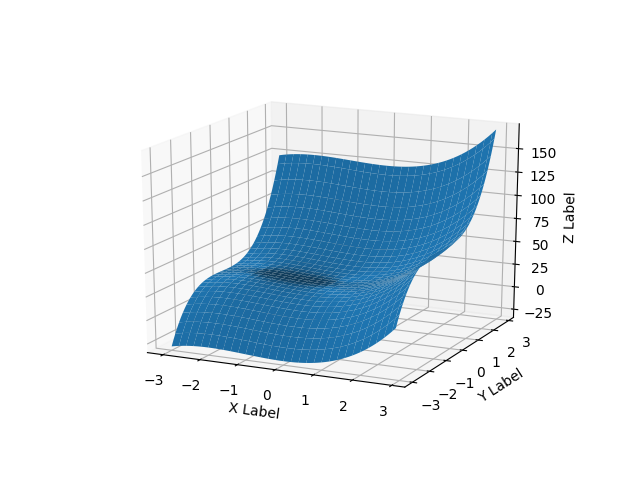

In [90]:
from mpl_toolkits.mplot3d import Axes3D
x_=np.arange(-3,3,.1)
y_=np.arange(-3,3,.1)

xx_, yy_=np.meshgrid(x_,y_)
F= xx_**3 +3*yy_**3+3*xx_**2+3*yy_**2+24

fig=plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(xx_,yy_,F)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## 4.4 Ejemplo  (tarea) 

El total de los ingresos semanales que obtienen una fábrica de vender sus sistemas de estantes con altavoces está dado por: 
$$R(x,y)=-\frac{1}{4}x^2-\frac{3}{8}y^2-\frac{1}{4}xy+300x+240y$$
* Donde x denota el número completo de unidades ensambladas
* Y el número de kits fabricados y vendidos cada semana

El total del costo semanal atribuible a la fabricación de esos altavoces es:

$$C(x,y)=180x+140y+5000$$

Determine cuántas unidades ensambladas y cuántos kits debería fabricar por semana para maximizar sus utilidades.

**¿Cuál es la utilidad máxima?**


In [99]:
U=-(1/4)*x**2-(3/8)*y**2-(1/4)*x*y+300*x+240*y-180*x-140*y-5000
U

In [100]:
H=hessian(U,[x,y])
H

⎡-0.5   -0.25⎤
⎢            ⎥
⎣-0.25  -0.75⎦

In [101]:
D=H.det()
D

In [102]:
gradiente=[U.diff(var) for var in [x,y]]
gradiente

In [103]:
pcs=solve(gradiente)
pcs

In [104]:
if type(pcs)!= list:
    pcs2=[pcs]
else:
    pcs2=pcs
pcs2

In [105]:
for p in pcs2:
    if D >0 and H[0,0].subs({x:p[x],y:p[y]})<0:
        print("Existe un máximo relativo en el punto:")
        print("x=",p[x],"y=",p[y])
    if D>0 and H[0,0].subs({x:p[x],y:p[y]})>0:
        print("Existe un mínimo relativo en el punto:")
        print("x=",p[x],"y=",p[y])
    if D<0:
        print("Existen un punto silla en la coordenada:")
        print("x=",p[x],"y=",p[y])
    if D==0:
        print("La prueba es inconclusa")

Existe un máximo relativo en el punto:
x= 208.000000000000 y= 64.0000000000000
